## Problem 1

(a) Fibonacci numbers are difined as $$F_0=0,\,F_1=1,\,F_n=F_{n-1}+F_{n-2}.$$

In [71]:
f0 = 0
f1 = 1
seq = [f0, f1]

for i in range(48):
    f2 = f0+f1
    f0 = f1
    f1 = f2
    seq.append(f2)

print(seq)


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049]


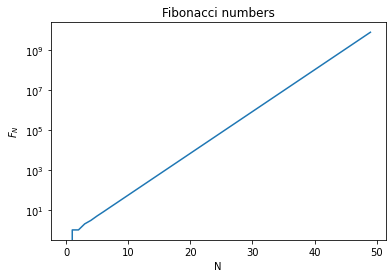

In [72]:
import matplotlib.pyplot as plt

plt.plot(range(50), seq)
plt.yscale('log')

plt.xlabel('N')
plt.ylabel('$F_N$')
plt.title('Fibonacci numbers')

plt.show()


(b) Find the largest Fibonacci number that is not larger than x.

In [73]:
def func(x):

    if x < 0:
        return x, None, None

    n = int(x)
    if n == 0:
        f1, N = 0.0, 0
    elif n == 1:
        f1, N = 1.0, 2
    else:
        f0 = 0.0
        f1 = 1.0
        for i in range(n):
            f2 = f0 + f1
            N = i+1
            if f2 > n:
                break
            f0 = f1
            f1 = f2

    return x, f1, N


x, fi, N = func(12345678.9)

if fi == None:
    print('All Fibonacci numbers are greater than {}.'.format(x))
else:
    print('The largest Fibonacci number is not larger than {} is {}, and it is the {}-th element in the sequence.'.format(x, f1, N))


The largest Fibonacci number is not larger than 12345678.9 is 7778742049, and it is the 35-th element in the sequence.


## Problem 2

(a) Given $$A= 
  \begin{pmatrix}
    2 & 1 & -1\\
    -2 & 5 & -1\\
    -2 & 1 & 3
  \end{pmatrix},$$
  find all eigenvalues of A.

In [74]:
import numpy as np

A = np.array([[2, 1, -1], [-2, 5, -1], [-2, 1, 3]])
w = np.linalg.eigvals(A)

print('Eigenvalues are {}'.format(w))


Eigenvalues are [2. 4. 4.]


For a real matrix $A$, we have $$x^TAx=\frac{1}{2}(x^T(A+A^T)x),$$ and $A+A^T$ is symmetric. So $A$ is positive definite iff $A+A^T$ is positive definite, iff all the eigenvalues of $A+A^T$ are positive.

In [75]:
def is_pos_def(A):
    return np.all(np.linalg.eigvals(A+A.T) > 0)


print('A is {}positive definite.'.format('' if is_pos_def(A) else 'NOT '))


A is positive definite.


(b) Given $Q=\frac{1}{M} X^TX$, calculate $Q$ and check that it is positive definite.

In [86]:
X = np.array([[52, 173],
              [59, 184],
              [67, 194],
              [73, 211],
              [64, 196],
              [74, 220],
              [54, 188],
              [61, 188],
              [65, 207],
              [46, 167],
              [72, 217]])

Q = X.T.dot(X)/len(X)
print('Q = {}'.format(Q))
print('Q is {}positive definite.'.format('' if is_pos_def(Q) else 'NOT '))


Q = [[ 3976.09090909 12314.36363636]
 [12314.36363636 38297.54545455]]
Q is positive definite.


## Problem 3

(a) Consider the quadratic form
  $$f(\textbf{x})=\frac{1}{2}\textbf{x}^{T}A\textbf{x}-\textbf{b}^{T}\textbf{x}+c$$
  where $A=\begin{pmatrix} 3 & -2 \\-2 & 5 \end{pmatrix}$, $\textbf{b}=\begin{pmatrix}-1\\8 \end{pmatrix}$, $c=2$.
The gradient of $f(\textbf{x})$ is
$$\nabla f(\textbf{x})=A\textbf{x}-\textbf{b}$$
To find the optimal $\textbf{x}$, we first try gradient descent method.

In [77]:
A = np.array([[3, -2], [-2, 5]])
b = np.array([[-1], [8]])
c = 2


def f(x, A, b, c):
    return 0.5*x.T.dot(A).dot(x) - b.T.dot(x) + c


def paraboloid(A, b, c):
    size = 50
    x1 = x2 = np.linspace(-3, 3, size)
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([[x1[i, j]], [x2[i, j]]])
            zs[i, j] = f(x, A, b, c)
    return x1, x2, zs


def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(10, 10))
    levels = [-5.4, -5.2, -5, -4.5] + [i for i in range(-4, 20)]
    cp = plt.contour(x1, x2, zs, levels)
    plt.clabel(cp, inline=1, fontsize=8)
    plt.grid(True)
    if steps is not None:
        steps = np.array(steps)
        plt.plot(steps[:, 0], steps[:, 1], '-o')
    fig.show()


In [78]:
x1, x2, zs = paraboloid(A, b, c)


In [79]:
def descent(steepest=False, check=False):
    x = np.array([[0], [0]])
    steps = [(0., 0.)]
    i = 0
    eps = 0.001
    alpha = 0.01
    r = b - A.dot(x)
    delta = r.T.dot(r)[0][0]
    delta0 = delta
    costs = [delta**0.5]
    while delta > eps**2 * delta0:
        if steepest:
            alpha = delta/r.T.dot(A.dot(r))

        x = x + alpha*r
        steps.append((x[0, 0], x[1, 0]))

        r0 = r
        r = b - A.dot(x)
        if check:
            print('r_{}*r_{} = {}'.format(i+1, i, r0.T.dot(r)[0][0]))

        delta = r.T.dot(r)[0][0]
        costs.append(delta**0.5)
        i += 1
        
    return steps, i, x, costs


Local mininum occurs at: [[0.99611987]
 [1.99760194]]
Number of iterations: 339


C:\Users\12568\AppData\Local\Temp\ipykernel_11784\3509419188.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


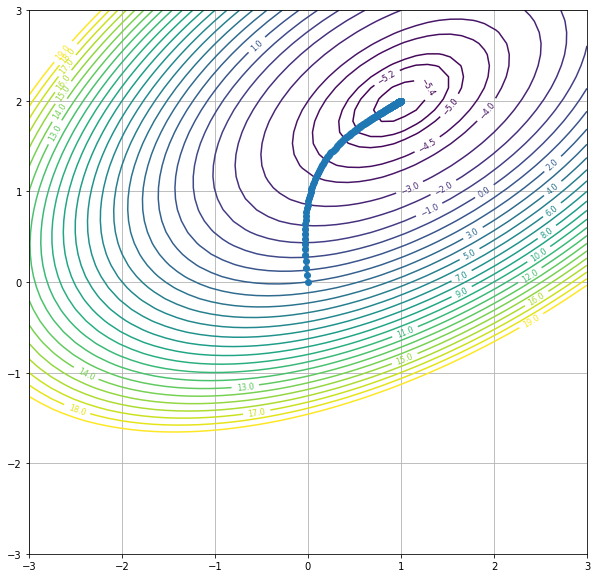

In [80]:
steps1, i, x, costs1 = descent()
contoursteps(x1, x2, zs, steps1)
print("Local mininum occurs at: " + str(x))
print("Number of iterations: " + str(i))


Now we try steepest descent method.

Local mininum occurs at: [[0.99784567]
 [1.99902542]]
Number of iterations: 9


C:\Users\12568\AppData\Local\Temp\ipykernel_11784\3509419188.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


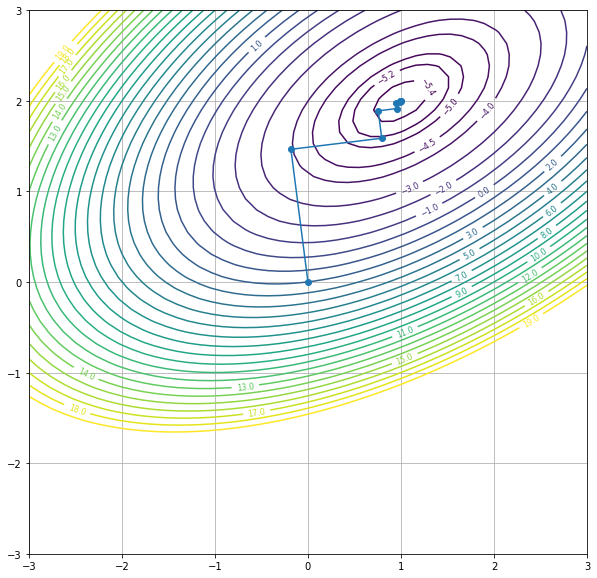

In [81]:
steps2, j, y, costs2 = descent(steepest=True)
contoursteps(x1, x2, zs, steps2)
print("Local mininum occurs at: " + str(y))
print("Number of iterations: " + str(j))


(b) Gradient descent uses 339 steps to converge, while steepest descent uses 9. Clearly steepest descent performs better. Their costs against number of iteration is plotted below.

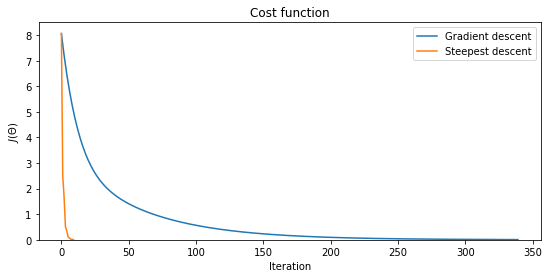

In [82]:
plt.figure(figsize=(9, 4))
plt.plot([i for i in range(i+1)], costs1, label='Gradient descent')
plt.plot([i for i in range(j+1)], costs2, label='Steepest descent')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function")

plt.ylim(0, 8.5)
plt.legend()
plt.show()


(c) Indeed, $\textbf{r}^{(k)}\cdot \textbf{r}^{(k-1)} = 0$ for each $k$ (with small deviations that are due to floating point errors).

In [83]:
_, __, ___, foo = descent(steepest=True, check=True)


r_1*r_0 = -3.552713678800501e-15
r_2*r_1 = 1.1102230246251565e-16
r_3*r_2 = -8.465450562766819e-16
r_4*r_3 = 1.734723475976807e-17
r_5*r_4 = -6.158268339717665e-16
r_6*r_5 = 2.7321894746634712e-17
r_7*r_6 = -6.001059024707267e-17
r_8*r_7 = 4.851804721872632e-18
r_9*r_8 = 1.5924219408380846e-19
